In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

movies = pd.read_csv("IMDb movies.csv")
moviesdf = pd.DataFrame(movies)

/Users/shrutiitalia/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [2]:
moviesdf.drop(columns=['budget', 'usa_gross_income', 'worlwide_gross_income', 'metascore'], inplace=True, axis=1)

In [3]:
# filling in the na as 0 for reviews as reviews are on a scale of 0-10
moviesdf["reviews_from_users"] = moviesdf["reviews_from_users"].fillna(0)
moviesdf["reviews_from_critics"] = moviesdf["reviews_from_critics"].fillna(0)
moviesdf.isnull().sum()

imdb_title_id              0
title                      0
original_title             0
year                       0
date_published             0
genre                      0
duration                   0
country                   64
language                 833
director                  87
writer                  1572
production_company      4455
actors                    69
description             2115
avg_vote                   0
votes                      0
reviews_from_users         0
reviews_from_critics       0
dtype: int64

In [4]:
# filling in the na for the attributes that should remain as strings
# all NA are UNKNOWN
moviesdf["country"] = moviesdf["country"].fillna("UNKNOWN")
moviesdf["language"] = moviesdf["language"].fillna("UNKNOWN")
moviesdf["director"] = moviesdf["director"].fillna("UNKNOWN")
moviesdf["writer"] = moviesdf["writer"].fillna("UNKNOWN")
moviesdf["production_company"] = moviesdf["production_company"].fillna("UNKNOWN")
moviesdf["actors"] = moviesdf["actors"].fillna("UNKNOWN")
moviesdf["description"] = moviesdf["description"].fillna("UNKNOWN")
moviesdf.isnull().sum()

imdb_title_id           0
title                   0
original_title          0
year                    0
date_published          0
genre                   0
duration                0
country                 0
language                0
director                0
writer                  0
production_company      0
actors                  0
description             0
avg_vote                0
votes                   0
reviews_from_users      0
reviews_from_critics    0
dtype: int64

In [5]:
ratings = pd.read_csv("IMDb ratings.csv")
ratingsdf = pd.DataFrame(ratings)

In [6]:
ratingsdf.drop(columns=['allgenders_0age_avg_vote',
                         'allgenders_0age_votes',
                         'allgenders_18age_avg_vote',
                         'allgenders_18age_votes',
                         'allgenders_30age_avg_vote',
                         'allgenders_30age_votes',
                         'allgenders_45age_avg_vote',
                         'allgenders_45age_votes',
                         'males_0age_avg_vote',
                         'males_0age_votes',
                         'males_18age_avg_vote',
                         'males_18age_votes',
                         'males_30age_avg_vote',
                         'males_30age_votes', 
                         'males_45age_avg_vote', 
                         'males_45age_votes', 
                         'females_0age_avg_vote', 
                         'females_0age_votes', 
                         'females_18age_avg_vote', 
                         'females_18age_votes', 
                         'females_30age_avg_vote', 
                         'females_30age_votes', 
                         'females_45age_avg_vote', 
                         'females_45age_votes', 
                         'top1000_voters_rating', 
                         'top1000_voters_votes', 
                         'us_voters_rating', 
                         'us_voters_votes', 
                         'non_us_voters_rating', 
                         'non_us_voters_votes'], inplace=True, axis=1)

In [7]:
ratingsdf = ratingsdf.fillna(0)
ratingsdf.isnull().sum()

imdb_title_id               0
weighted_average_vote       0
total_votes                 0
mean_vote                   0
median_vote                 0
votes_10                    0
votes_9                     0
votes_8                     0
votes_7                     0
votes_6                     0
votes_5                     0
votes_4                     0
votes_3                     0
votes_2                     0
votes_1                     0
males_allages_avg_vote      0
males_allages_votes         0
females_allages_avg_vote    0
females_allages_votes       0
dtype: int64

In [8]:
names = pd.read_csv("IMDb names.csv")
namesdf = pd.DataFrame(names)

In [9]:
namesdf.drop(columns=['birth_name', 'height', 'bio', 'birth_details', 
                       'place_of_birth', 'date_of_birth', 'place_of_birth', 
                       'death_details', 'date_of_death', 'place_of_death', 
                       'reason_of_death', 'spouses_string', 'spouses', 
                       'divorces', 'spouses_with_children', 'children'], inplace=True, axis=1)

In [10]:
namesdf.isnull().sum()

imdb_name_id    0
name            0
dtype: int64

In [11]:
titleP = pd.read_csv("IMDb title_principals.csv")
titlePdf = pd.DataFrame(titleP)

In [12]:
titlePdf.drop(columns=['job', 'characters'], inplace=True, axis=1)


In [13]:
titlePdf.isnull().sum()


imdb_title_id    0
ordering         0
imdb_name_id     0
category         0
dtype: int64

In [14]:
# merged moviesdf and ratingsdf on the common attribute imdb_title_id
movies_ratings_df = pd.merge( moviesdf, ratingsdf, on='imdb_title_id', how='outer')

# merges title_principle dataframe with name dataframe based on the imdb_name_id
titles_names_df = pd.merge( titlePdf, namesdf, on='imdb_name_id', how='outer')
titles_names_df = titles_names_df.dropna()

# merging the two merged dataframes into one complete dataframe based on 'imdb_title_id'
complete_df = pd.merge( movies_ratings_df, titles_names_df, on='imdb_title_id', how='outer')
complete_df = complete_df.dropna()
complete_df.isnull().sum()

imdb_title_id               0
title                       0
original_title              0
year                        0
date_published              0
genre                       0
duration                    0
country                     0
language                    0
director                    0
writer                      0
production_company          0
actors                      0
description                 0
avg_vote                    0
votes                       0
reviews_from_users          0
reviews_from_critics        0
weighted_average_vote       0
total_votes                 0
mean_vote                   0
median_vote                 0
votes_10                    0
votes_9                     0
votes_8                     0
votes_7                     0
votes_6                     0
votes_5                     0
votes_4                     0
votes_3                     0
votes_2                     0
votes_1                     0
males_allages_avg_vote      0
males_alla

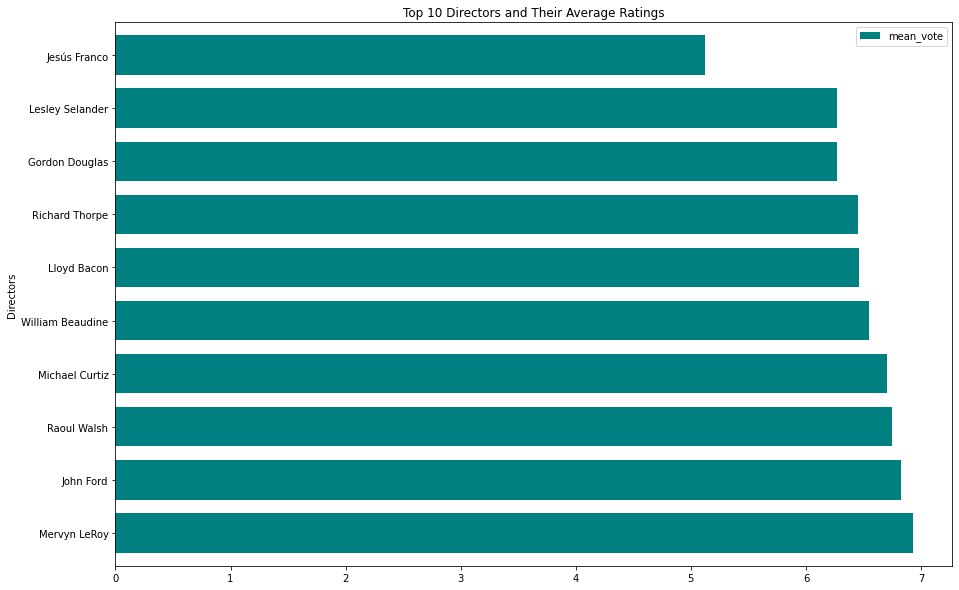

In [15]:
# to get the mena of the avg votes
directors_mean_df = complete_df.groupby(['director'])[['mean_vote']].mean()

# to get the total movies they worked on
directors_total_df = complete_df.groupby(['director'])[['title']].count()

all_directors_df = pd.concat([directors_mean_df, directors_total_df], axis=1)
all_directors_df = all_directors_df.sort_values(['title'], ascending = False)

top_ten_directors = all_directors_df.head(10)

top_ten_directors = top_ten_directors.sort_values(['mean_vote'], ascending = False)
top_ten_directors.plot.barh(figsize=(15,10), y='mean_vote', width=.75, xlabel="Directors", ylabel="Rating", 
                            title="Top 10 Directors and Their Average Ratings", color=["teal"]);

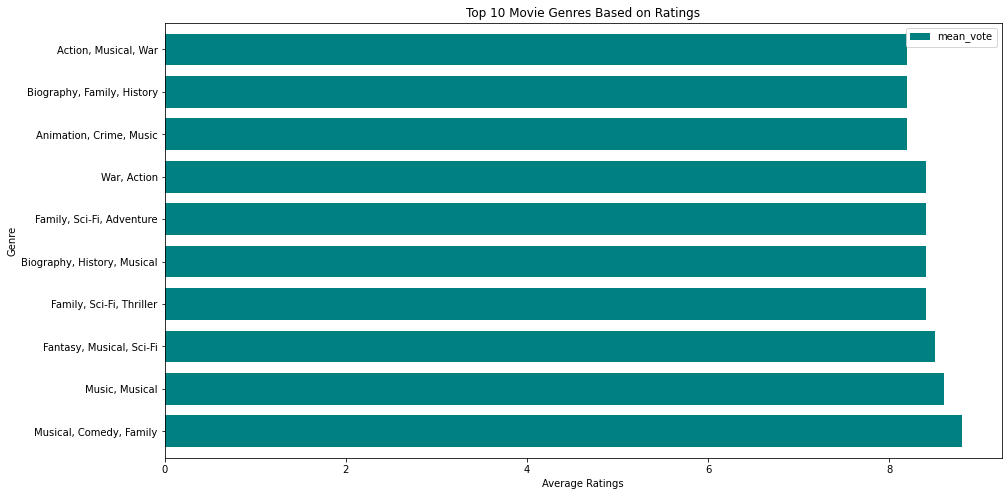

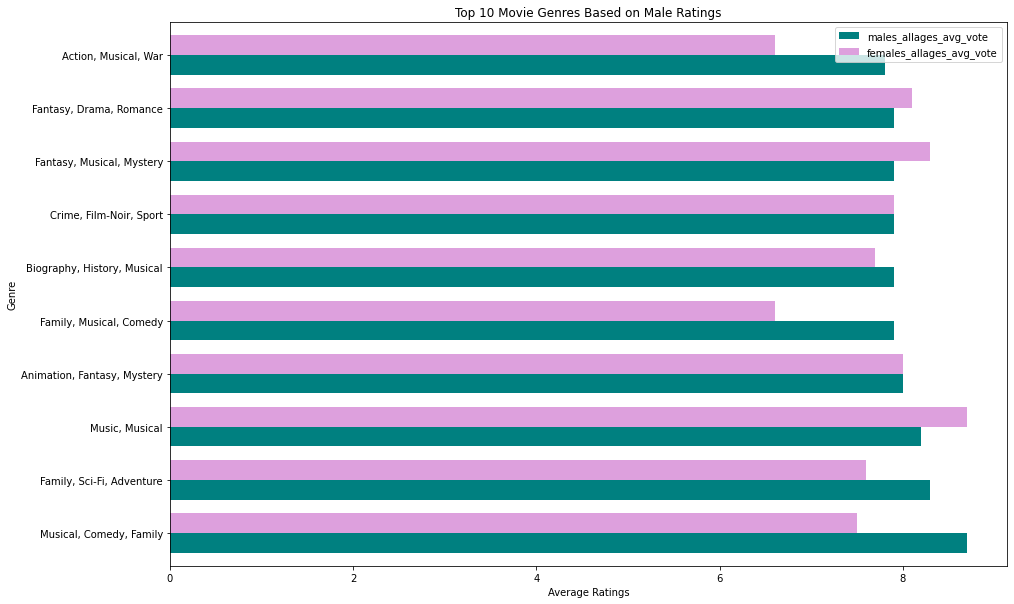

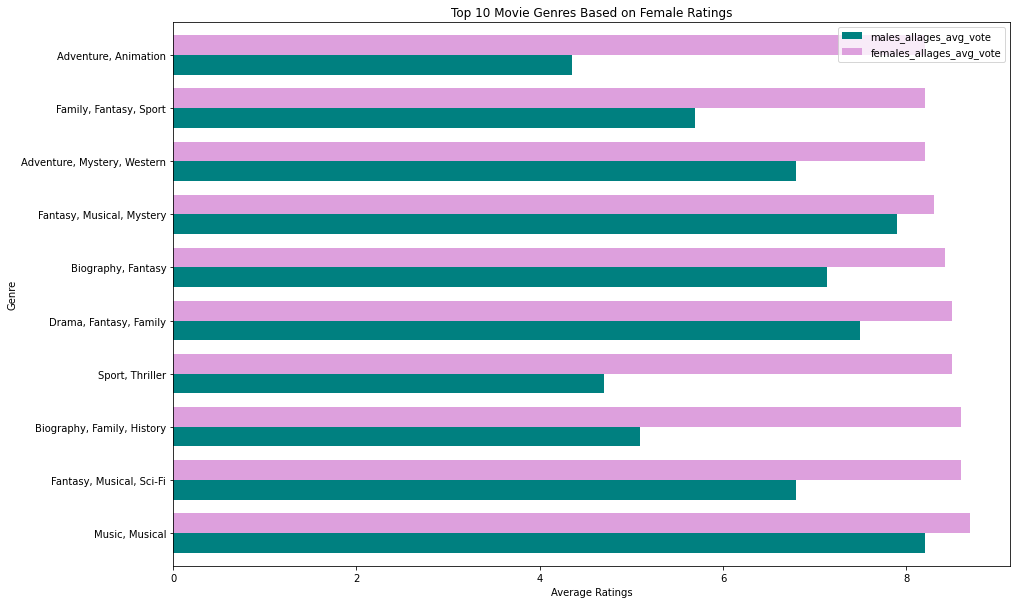

In [16]:
genredf = complete_df.groupby(['genre'])[['mean_vote']].mean().reset_index();
genredf = genredf.sort_values(['mean_vote'], ascending = False);

toptengenre = genredf.head(10)

toptengenre.plot.barh(figsize=(15,8), x="genre", width=.75, xlabel="Genre", title="Top 10 Movie Genres Based on Ratings", color="teal");
plt.xlabel("Average Ratings")
plt.xticks(rotation='horizontal');


male_female_genre = complete_df.groupby(['genre'])[['males_allages_avg_vote', 'females_allages_avg_vote']].mean().reset_index();
male_genre = male_female_genre.sort_values(['males_allages_avg_vote'], ascending = False);
female_genre = male_female_genre.sort_values(['females_allages_avg_vote'], ascending = False);


male_genre = male_genre.head(10)
male_genre.plot.barh(figsize=(15,10), x="genre", width=.75, xlabel="Genre", title="Top 10 Movie Genres Based on Male Ratings", color=["teal", "plum"]);
plt.xlabel("Average Ratings");


female_genre = female_genre.head(10)
female_genre.plot.barh(figsize=(15,10), x="genre", width=.75, xlabel="Genre", title="Top 10 Movie Genres Based on Female Ratings", color=["teal", "plum"]);
plt.xlabel("Average Ratings");

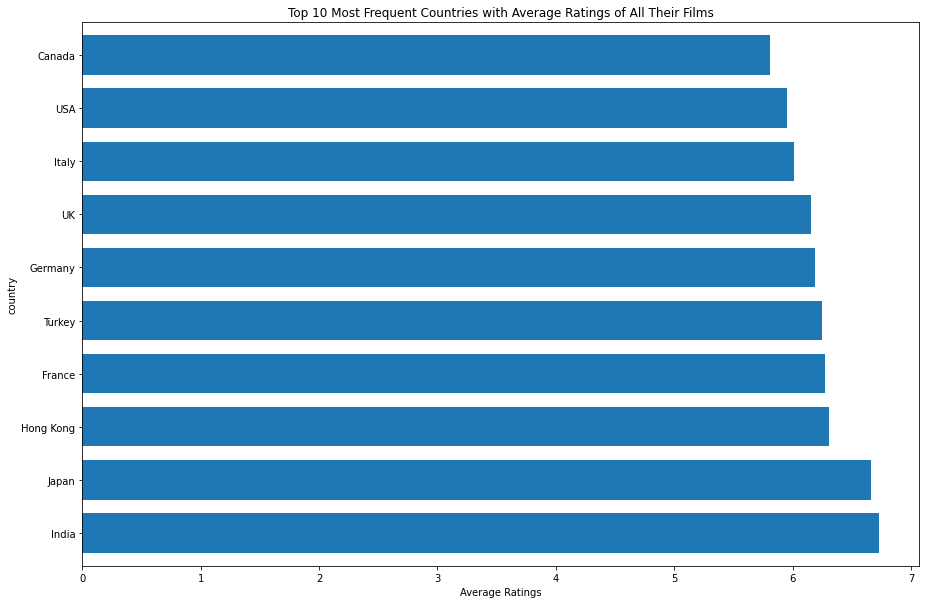

In [48]:
# EDA, Looking For Relation between Country Origin & Rating

# Finding Most Used Countries (top 10)
most_freq_countries = list(movies_ratings_df['country'].value_counts()[:10].index)

# Shrink Dataframe by Top10 Countries
df = movies_ratings_df[movies_ratings_df['country'].isin(most_freq_countries)]

# Calculating Avg Rating per Countries
s = df.groupby(by=['country'])['mean_vote'].sum()
c = df['country'].value_counts()

s.sort_index(inplace=True)
c.sort_index(inplace=True)

avg_rating_countries = s/c
avg_rating_countries = avg_rating_countries.sort_values(ascending = False)
# Graphing Findings
avg_rating_countries.plot.barh(figsize=(15,10), width=.75, title="Top 10 Most Frequent Countries with Average Ratings of All Their Films")
plt.xlabel("Average Ratings")
plt.show()

Text(0, 0.5, 'Country')

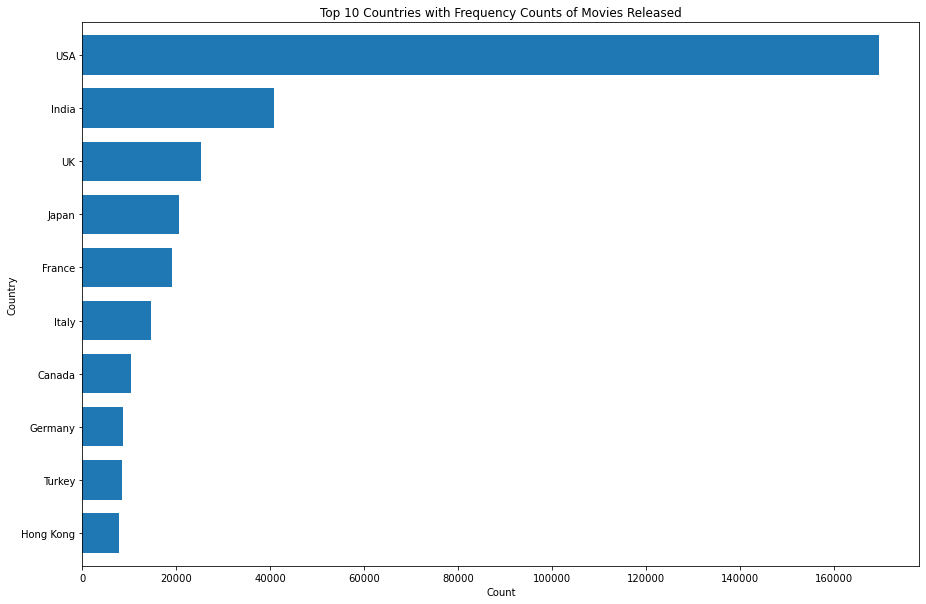

In [50]:
# EDA, Looking For Relation between Country Origin & Rating (Continued)

#Plotting Freq Counts
s = s.sort_values(ascending = True)
s.plot.barh(figsize=(15,10), width=.75, title="Top 10 Countries with Frequency Counts of Movies Released")
plt.xlabel("Count")
plt.ylabel("Country")

<ipython-input-19-f6d31ab7c4be>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(most_freq_countries)


Text(0, 0.5, 'Rating')

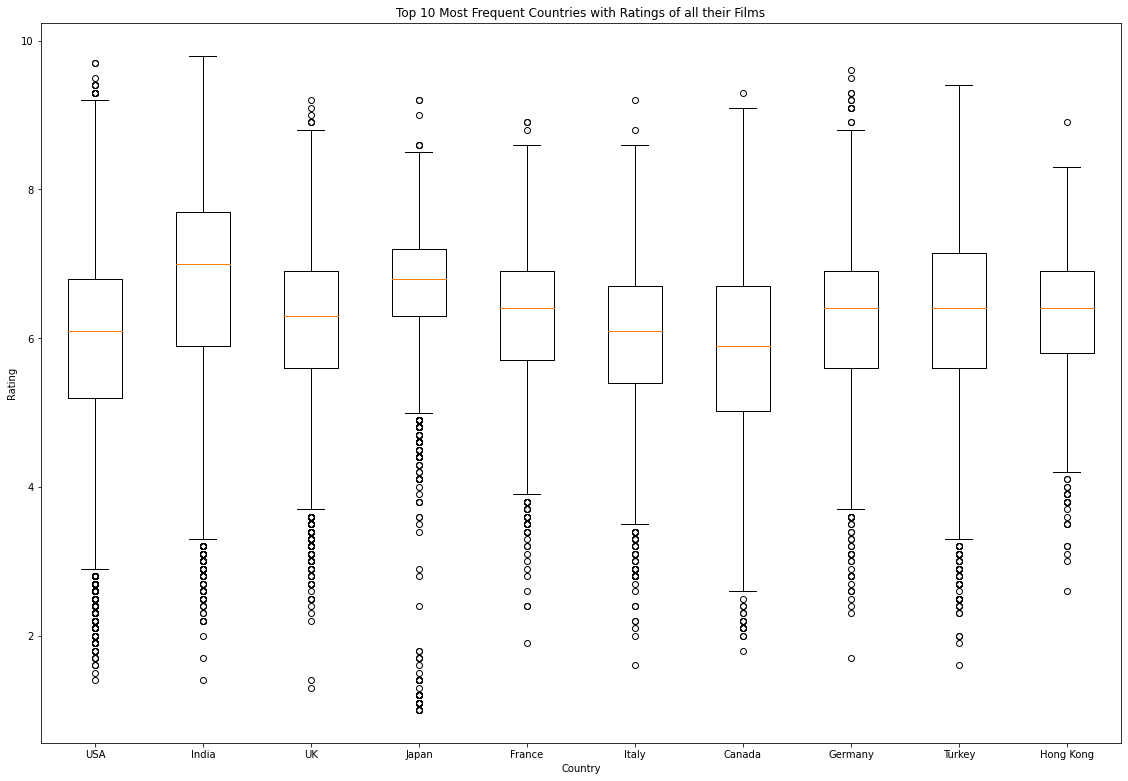

In [19]:
# EDA, Looking For Relation between Country Origin & Rating (Continued)

fig = plt.figure(figsize=(15,10))
ax = fig.add_axes([0,0,1,1])
country = []
#Plotting Quartile Info
for i in most_freq_countries:
    df_ = df[df['country'] == i]
    country.append(df_['mean_vote'])
    
ax.set_xticklabels(most_freq_countries)
bp = ax.boxplot(country)

# plt.show()
plt.title("Top 10 Most Frequent Countries with Ratings of all their Films")
plt.xlabel("Country")
plt.ylabel("Rating")